In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder
from lime import lime_tabular
from sklearn.model_selection import train_test_split

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import *
from sklearn.impute import *
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import *
from deap import base, creator, tools, algorithms
from datetime import datetime
from sklearn.svm import SVC
import warnings
import numpy as np
import random

In [2]:
df = pd.read_csv("arrhythmia.csv", header=None).replace("?", np.nan)
data = df.to_numpy()
x, y = data[:, :-1], data[:, -1]
y = pd.Series(y).apply(str)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
values = df.iloc[:, -1].values

# Calcula as estatísticas
print("Máximo =", np.max(values),
  "Mínimo =", np.min(values),
  "Média =", np.mean(values),
  "Mediana =", np.median(values),
  "Desvio Padrão =", np.std(values))

Máximo = 16 Mínimo = 1 Média = 3.8805309734513274 Mediana = 1.0 Desvio Padrão = 4.402219038329423


In [3]:
x_train

array([[57, 1, 166, ..., 1.8, 25.2, 38.5],
       [36, 1, 158, ..., 2.5, 12.7, 32.7],
       [47, 1, 163, ..., 0.7, 17.9, 22.3],
       ...,
       [40, 0, 178, ..., 2.4, 24.7, 49.1],
       [19, 1, 156, ..., 4.3, 16.1, 71.1],
       [33, 1, 160, ..., 1.4, 38.8, 45.5]], dtype=object)

In [4]:
encoder = OneHotEncoder()
encoder.fit(x_train)
encoded_train = encoder.transform(x_train)
rf = RandomForestClassifier()
rf.fit(encoded_train, y_train)

encoded_train

<361x13569 sparse matrix of type '<class 'numpy.float64'>'
	with 100719 stored elements in Compressed Sparse Row format>

In [5]:
df = pd.read_csv("resultados_KNN_SEED_13.csv")
df.head(5)

,strategy,k,n_neighbors,weights,algorithm,leaf_size,f1,elapsed_time
0,most_frequent,78,12,uniform,auto,13,0.395111,0.266047
1,most_frequent,253,2,NaN,brute,25,0.432073,0.119299
2,mean,48,3,NaN,kd_tree,49,0.525199,0.076088
3,mean,63,11,NaN,kd_tree,46,0.398277,0.068931
4,mean,193,19,distance,auto,14,0.377357,0.079870


In [6]:
# Exibe os resultados
print("Média da coluna 'f1':", df['f1'].mean())
print("Média da coluna 'elapsed_time':", df['elapsed_time'].mean())

Média da coluna 'f1': 0.4281218709020923
Média da coluna 'elapsed_time': 0.10723380909090909


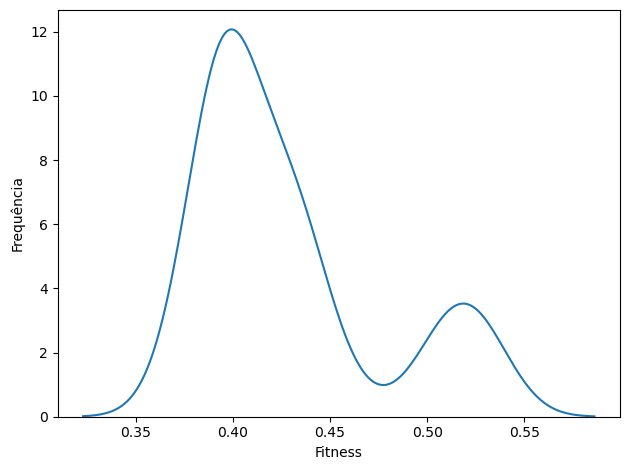

In [7]:
fig, ax = plt.subplots()
sns.kdeplot(df, x="f1", ax=ax)
ax.set_ylabel("Frequência")
ax.set_xlabel("Fitness")
fig.tight_layout()

<Axes: xlabel='elapsed_time', ylabel='Density'>

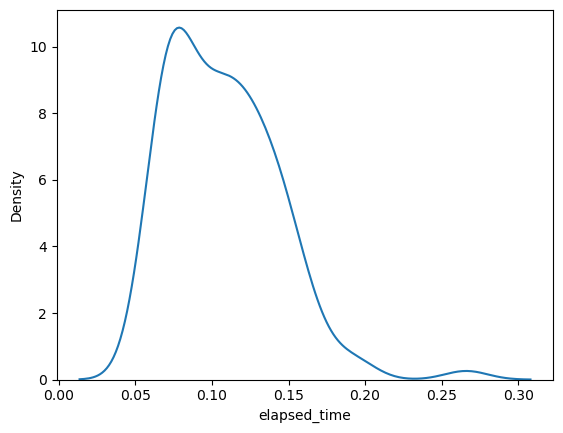

In [8]:
sns.kdeplot(df, x="elapsed_time")

In [9]:
X = df.to_numpy()[:, :-2]
y = df["f1"].astype(float)

df.head(5)

,strategy,k,n_neighbors,weights,algorithm,leaf_size,f1,elapsed_time
0,most_frequent,78,12,uniform,auto,13,0.395111,0.266047
1,most_frequent,253,2,NaN,brute,25,0.432073,0.119299
2,mean,48,3,NaN,kd_tree,49,0.525199,0.076088
3,mean,63,11,NaN,kd_tree,46,0.398277,0.068931
4,mean,193,19,distance,auto,14,0.377357,0.079870


In [10]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X)
X_encoded = enc.transform(X).toarray()

X_encoded

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [11]:
#t-SNE
x_embedded = TSNE(n_components=2).fit_transform(X_encoded)

x_embedded[:10]

array([[10.518088  ,  1.4517136 ],
       [ 6.675754  , -7.131323  ],
       [ 3.7151244 ,  0.3952279 ],
       [ 4.173432  ,  3.670046  ],
       [ 2.9789596 ,  6.97703   ],
       [ 6.76997   ,  8.400843  ],
       [-0.06661705,  4.2322    ],
       [-0.16305847,  0.9860714 ],
       [ 8.581905  ,  5.0936503 ],
       [ 1.561245  , -3.5531816 ]], dtype=float32)

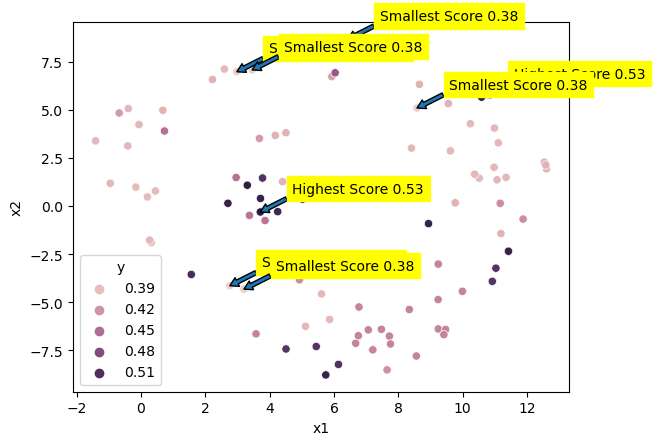

In [12]:
x_embedded_f1 = np.column_stack((x_embedded, df['f1']))
_df = pd.DataFrame(data=x_embedded_f1, columns=["x1", "x2", "y"])
_df.head(5)
ax = sns.scatterplot(data=_df, x="x1", y="x2", hue="y")

# plot highest fitness
coord = _df.loc[_df["y"] == _df["y"].max()]
for i, row in coord.iterrows():
    x, y = row["x1"], row["x2"]
    ax.annotate(f"Highest Score {row['y']:>.2f}", (x, y), (x+1, y+1), arrowprops={"width": 3, "headwidth": 7, "headlength": 6}, backgroundcolor="yellow")

# plot lowest fitness
coord = _df.loc[_df["y"] == _df["y"].min()]
for i, row in coord.iterrows():
    x, y = row["x1"], row["x2"]
    ax.annotate(f"Smallest Score {row['y']:>.2f}", (x, y), (x+1, y+1), arrowprops={"width": 3, "headwidth": 7, "headlength": 6}, backgroundcolor="yellow")

In [13]:
df.loc[df.f1 == df.f1.max()]

,strategy,k,n_neighbors,weights,algorithm,leaf_size,f1,elapsed_time
46,mean,78,3,NaN,kd_tree,49,0.531577,0.059494
76,most_frequent,78,3,NaN,kd_tree,38,0.531577,0.128268


In [28]:
# Exibe os resultados
print("Max da coluna 'f1' SEED 13:", df.f1.max())
print("Média da coluna 'f1' 13:", df['f1'].mean())
print("Média da coluna 'elapsed_time' 13:", df['elapsed_time'].mean())

Max da coluna 'f1' SEED 13: 0.504283942178679
Média da coluna 'f1' 13: 0.41855960819093957
Média da coluna 'elapsed_time' 13: 0.11726950420168067


In [23]:
df = pd.read_csv("resultados_KNN_SEED_47.csv")

# Exibe os resultados
print("Max da coluna 'f1' SEED 47:", df.f1.max())
print("Média da coluna 'f1': SEED 47", df['f1'].mean())
print("Média da coluna 'elapsed_time' SEED 47:", df['elapsed_time'].mean())

Max da coluna 'f1' SEED 47: 0.5634447229184072
Média da coluna 'f1': SEED 47 0.4052951137937408
Média da coluna 'elapsed_time' SEED 47: 0.07395803333333335


In [25]:
df = pd.read_csv("resultados_KNN_SEED_89.csv")

# Exibe os resultados
print("Max da coluna 'f1' SEED 89:", df.f1.max())
print("Média da coluna 'f1': SEED 89", df['f1'].mean())
print("Média da coluna 'elapsed_time' SEED 89:", df['elapsed_time'].mean())

Max da coluna 'f1' SEED 89: 0.5045850952166742
Média da coluna 'f1': SEED 89 0.4169926256626824
Média da coluna 'elapsed_time' SEED 89: 0.07102245600000001


In [24]:
df = pd.read_csv("resultados_KNN_Padrao.csv")

# Exibe os resultados
print("Max da coluna 'f1' Padrao:", df.f1.max())
print("Média da coluna 'f1': Padrao", df['f1'].mean())
print("Média da coluna 'elapsed_time' Padrao:", df['elapsed_time'].mean())

Max da coluna 'f1' Padrao: 0.4043801228011754
Média da coluna 'f1': Padrao 0.40438012280117547
Média da coluna 'elapsed_time' Padrao: 0.05953402702702703


In [29]:
df = pd.read_csv("resultados_KNN_3.csv")
# Exibe os resultados
print("Max da coluna 'f1':", df.f1.max())
print("Média da coluna 'f1':", df['f1'].mean())
print("Média da coluna 'elapsed_time':", df['elapsed_time'].mean())

Max da coluna 'f1': 0.504283942178679
Média da coluna 'f1': 0.41855960819093957
Média da coluna 'elapsed_time': 0.11726950420168067


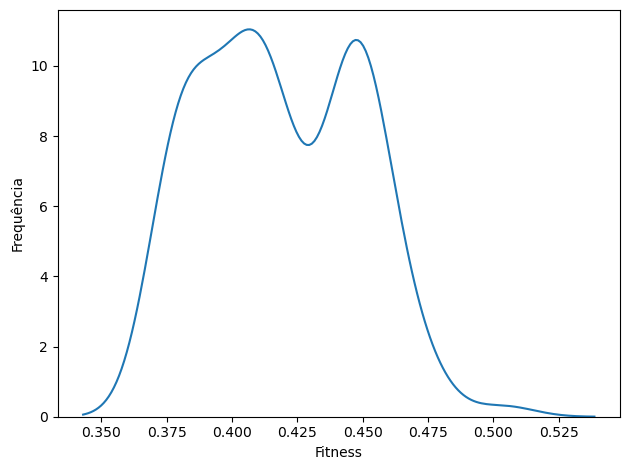

In [56]:
fig, ax = plt.subplots()
sns.kdeplot(df, x="f1", ax=ax)
ax.set_ylabel("Frequência")
ax.set_xlabel("Fitness")
fig.tight_layout()

<Axes: xlabel='elapsed_time', ylabel='Density'>

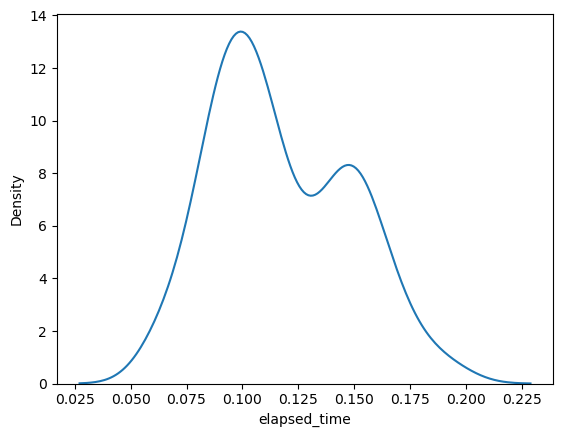

In [57]:
sns.kdeplot(df, x="elapsed_time")

C:\Users\maria\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


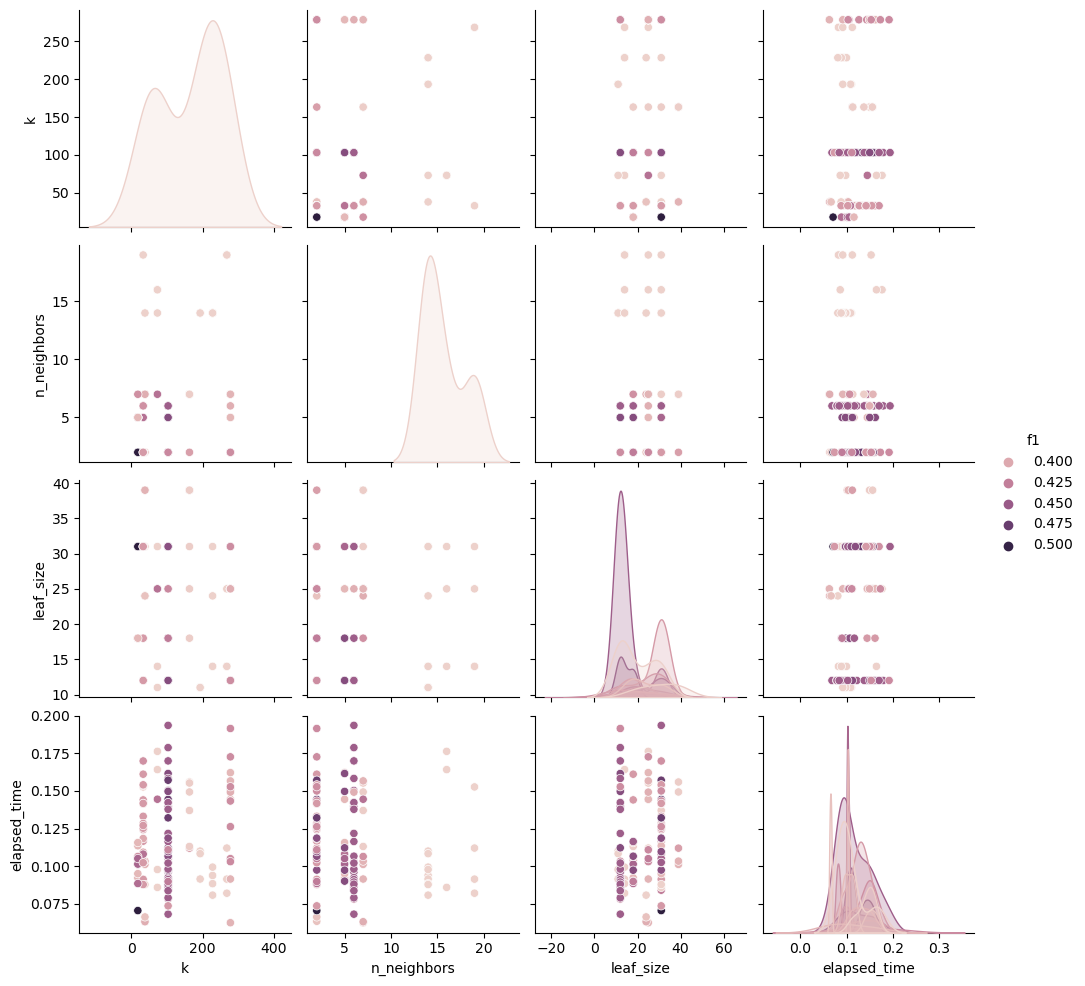

In [58]:
#df.f1.value_counts()

sns.pairplot( df, hue="f1" )

In [59]:
X = df.to_numpy()[:, :-2]
y = df["f1"].astype(float)

df.head(5)

,strategy,k,n_neighbors,weights,algorithm,leaf_size,f1,elapsed_time
0,most_frequent,33,2,distance,brute,31,0.408982,0.116611
1,most_frequent,73,16,distance,auto,25,0.377357,0.176234
2,most_frequent,163,7,NaN,kd_tree,39,0.379950,0.149281
3,mean,103,6,distance,brute,12,0.447361,0.090884
4,mean,193,14,uniform,kd_tree,11,0.377357,0.110049


In [60]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X)
X_encoded = enc.transform(X).toarray()

X_encoded

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [61]:
#t-SNE
x_embedded = TSNE(n_components=2).fit_transform(X_encoded)

x_embedded[:10]

array([[-1.7744192 ,  3.5193567 ],
       [ 0.4524168 , -3.2707934 ],
       [ 5.6313095 ,  3.9870448 ],
       [-9.049831  , -3.1285539 ],
       [ 9.288302  , -1.6326576 ],
       [-0.83445317, -9.017928  ],
       [ 5.1980395 , -8.001831  ],
       [ 6.976575  , -5.418167  ],
       [ 6.59547   , -1.7306898 ],
       [ 4.249694  , -0.7482367 ]], dtype=float32)

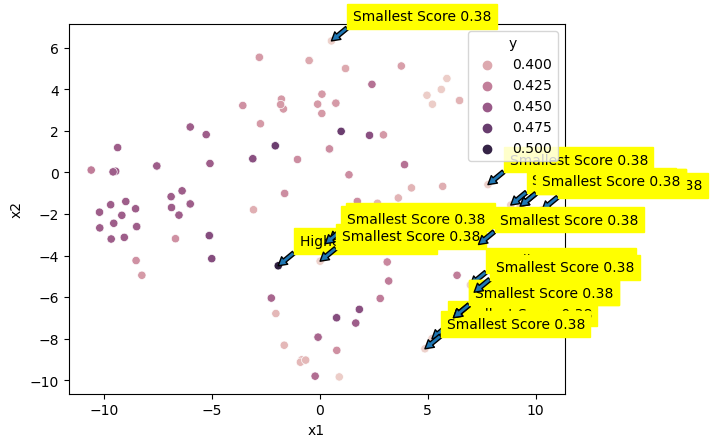

In [62]:
x_embedded_f1 = np.column_stack((x_embedded, df['f1']))
_df = pd.DataFrame(data=x_embedded_f1, columns=["x1", "x2", "y"])
_df.head(5)
ax = sns.scatterplot(data=_df, x="x1", y="x2", hue="y")

# plot highest fitness
coord = _df.loc[_df["y"] == _df["y"].max()]
for i, row in coord.iterrows():
    x, y = row["x1"], row["x2"]
    ax.annotate(f"Highest Score {row['y']:>.2f}", (x, y), (x+1, y+1), arrowprops={"width": 3, "headwidth": 7, "headlength": 6}, backgroundcolor="yellow")

# plot lowest fitness
coord = _df.loc[_df["y"] == _df["y"].min()]
for i, row in coord.iterrows():
    x, y = row["x1"], row["x2"]
    ax.annotate(f"Smallest Score {row['y']:>.2f}", (x, y), (x+1, y+1), arrowprops={"width": 3, "headwidth": 7, "headlength": 6}, backgroundcolor="yellow")

In [63]:
df.loc[df.f1 == df.f1.max()]

,strategy,k,n_neighbors,weights,algorithm,leaf_size,f1,elapsed_time
73,median,18,2,distance,kd_tree,31,0.504284,0.070553


In [64]:
# Exibe os resultados
print("Média da coluna 'f1':", df['f1'].mean())
print("Média da coluna 'elapsed_time':", df['elapsed_time'].mean())

Média da coluna 'f1': 0.41855960819093957
Média da coluna 'elapsed_time': 0.11726950420168067


In [65]:
df_X = pd.read_csv("arrhythmia.csv", header=None).replace("?", np.nan)
df_X.shape

(452, 280)

In [ ]:
# Usei esse site como exemplo: https://marcotcr.github.io/lime/tutorials/Tutorial%20-%20continuous%20and%20categorical%20features.html
RANDOM_STATE = 42

df_X = pd.read_csv("arrhythmia.csv", names=list(map(lambda X: f"col_{X}", range(280)))).replace("?", np.nan)
data = df_X.to_numpy()
X, y = data[:, :-1], data[:, -1]
X = X.astype(float)
y = pd.Series(y).astype(float)

preprocess = Pipeline([
        ('imputer', SimpleImputer(strategy="mean"))])

pipeline = pipe = Pipeline([
        ('imputer', SimpleImputer(strategy="mean")),
        ('scaler', StandardScaler()),
        ('feature-selection', SelectKBest(k=113)),
        ('knn', KNeighborsClassifier(
            n_neighbors=3,
            weights="distance",
            algorithm="ball_tree",
            leaf_size=19))])

pipeline.fit(X, y)
X = preprocess.fit_transform(X, y)
class_ = pipeline.classes_
y_pred = pipeline.predict(X)

explainer = LimeTabularExplainer(X,
                                 feature_names=df_X.columns[:-1],
                                 class_names=class_)

for i, (y, yp) in enumerate(zip(y, y_pred)):
    if y == yp:
        print(f"classe real: {y}, predição: {yp}")
        exp = explainer.explain_instance(X[i], pipeline.predict_proba)
        exp.show_in_notebook(show_table=True, show_all=False)

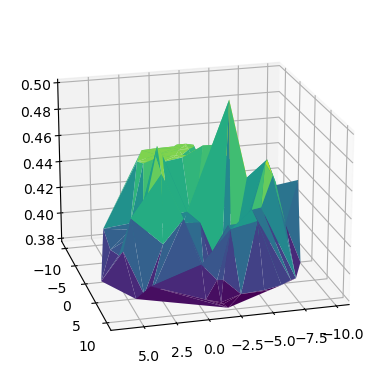

In [66]:
#cria uma imagem 3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

X = x_embedded_f1[:, 0]
Y = x_embedded_f1[:, 1]
Z = x_embedded_f1[:, 2]

#Arredondar os valores de X, Y e Z
X = np.round(X, 2)
Y = np.round(Y, 2)
Z = np.round(Z, 2)

ax.plot_trisurf(Y, X, Z, cmap='viridis', linewidth=0.2)
ax.view_init(20, 75)

plt.show()

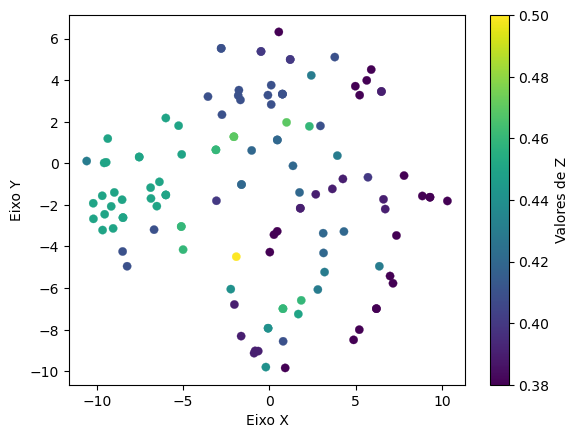

In [67]:
#cria uma imagem 2D que mostre o Z evidente
fig = plt.figure()
ax = fig.add_subplot()

X = x_embedded_f1[:, 0]
Y = x_embedded_f1[:, 1]
Z = x_embedded_f1[:, 2]

#Arredondar os valores de X, Y e Z
X = np.round(X, 2)
Y = np.round(Y, 2)
Z = np.round(Z, 2)

scatter = ax.scatter(X, Y, c=Z, cmap='viridis', linewidth=0.2)

#Definir os rótulos dos eixos
ax.set_xlabel('Eixo X')
ax.set_ylabel('Eixo Y')

# Adicione uma barra de cores
cbar = plt.colorbar(scatter)
cbar.set_label('Valores de Z')

plt.show()